In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv('../datasets/diabetes.csv')

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Checking null values in given dataset 
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
## As we seen their is some 0 values in glucose , bolldpressure , insulin and bmi so we replace that with the mean of that feature
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

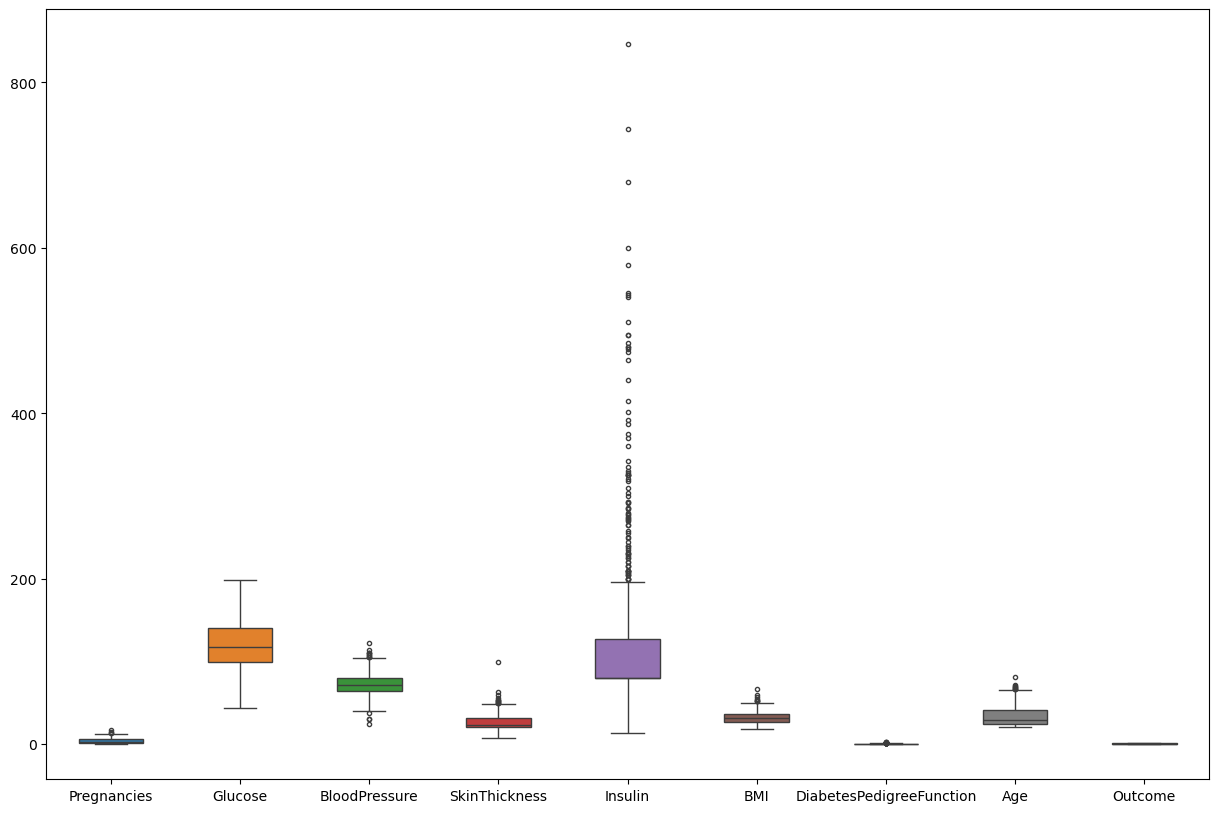

In [13]:
## Checking outliers in dataset 
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

# let's split the dataset into dependent and independent features 
#### Theres is many outliers in Insulin feature so we can handle these with Stander-Scaling Technique later 

In [14]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']
X.shape, y.shape

((768, 8), (768,))

In [15]:
## Spliting features into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [16]:
## Apllying stander scaling to the independent feature to reduce outliers
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [17]:
## Storing the scaler files in directory 
import pickle
pickle.dump(scalar,open('../model/Std_scalar.pkl','wb'))

## Training data after scaling looks like 

<AxesSubplot: >

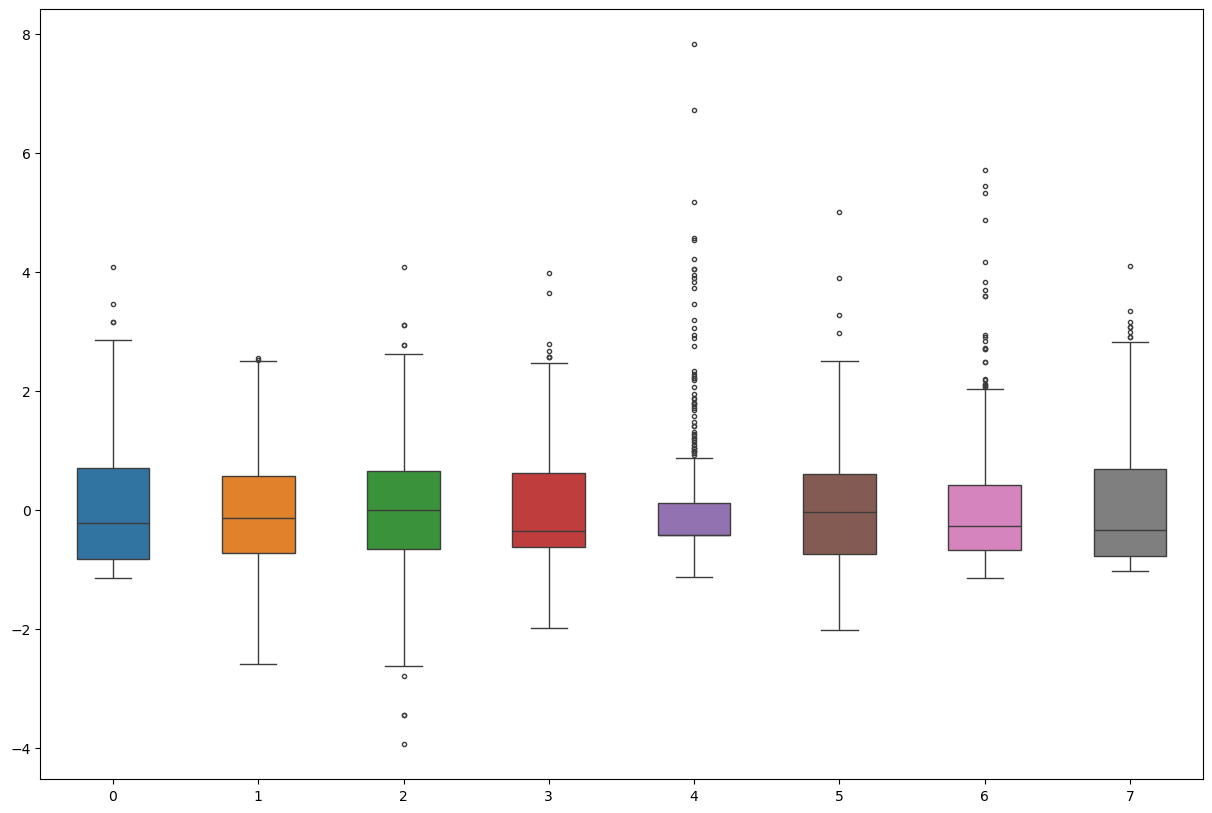

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X_train_scaled, width=0.5, ax=ax, fliersize=3)

# Applying Model Selection with Hyperparameter tunning 

In [19]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [20]:
log_model = LogisticRegression()

In [21]:
## Applying Hyperparameter Tunning 
from sklearn.model_selection import GridSearchCV
params = {
    'penalty':['l1', 'l2'],
    'solver':['lbfgs', 'liblinear','newton-cg']
}
clf = GridSearchCV(log_model, param_grid=params,scoring='accuracy',cv=10)
clf.fit(X_train_scaled,y_train)
clf.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [22]:
log_model = LogisticRegression(solver='liblinear', penalty='l1')

In [23]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [24]:
X_test_scaled

array([[ 0.69748316, -0.79622517, -1.15754597, ...,  0.24812762,
        -0.11680393,  0.85019217],
       [-0.52953881, -0.33127247,  0.23507814, ...,  0.492445  ,
        -0.94192338, -1.03426754],
       [-0.52953881, -0.4641161 , -0.66603158, ..., -0.21176391,
        -0.91266382, -1.03426754],
       ...,
       [-1.14304979,  0.16689114,  0.64467346, ...,  0.57867466,
         0.97750343, -0.86295302],
       [ 0.69748316, -0.56374882, -0.17451719, ..., -0.21176391,
        -1.01799822,  0.33624861],
       [ 0.39072767, -1.49365422,  0.80851159, ...,  0.50681661,
        -0.91851573,  0.16493409]])

In [25]:
y_pred = log_model.predict(X_test_scaled)

In [26]:
pickle.dump(log_model,open('../model/log_model.pkl','wb'))

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[125  33]
 [ 26  47]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       158
           1       0.59      0.64      0.61        73

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.75      0.74      0.75       231

